In [116]:
# Required library for the projects
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
# copy
# Load all required data here 
Walmart=pd.read_csv(r"C:\Users\chemi\Downloads\Walmart.csv",encoding ="latin")

In [118]:
Walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [119]:
#Set index to Data column
Walmart.set_index("Date",inplace=True)

# EDA

In [147]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2+ KB


In [148]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,8.0,9.087495e+05,0.069930,62.513986,3.219699,219.439026,6.091846
std,0.0,1.062808e+05,0.255926,16.024850,0.427313,4.435398,0.362740
min,8.0,7.725391e+05,0.000000,24.480000,2.514000,213.665536,5.124000
25%,8.0,8.559054e+05,0.000000,49.720000,2.764500,214.915428,5.825000
50%,8.0,8.933998e+05,0.000000,63.550000,3.290000,218.891073,6.290000
75%,8.0,9.290211e+05,0.000000,76.065000,3.594000,224.073391,6.315000
max,8.0,1.511641e+06,1.000000,87.260000,3.907000,227.036936,6.433000


## Univariate Analysis

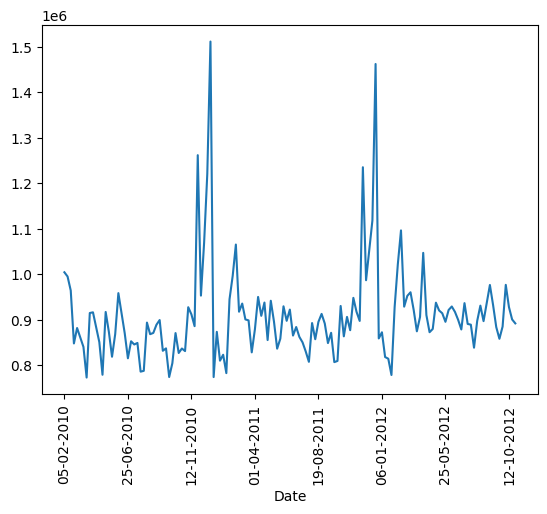

In [162]:
plt.figure()
walmart.Weekly_Sales.plot()
plt.xticks(rotation=90)
plt.show()

 #### Here  we find that the maximum sales in dec- 2010 and dec 2011 

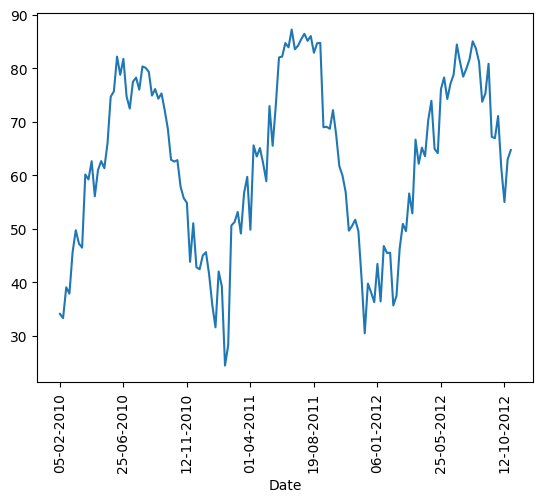

In [157]:
plt.figure()
walmart.Temperature.plot()
plt.xticks(rotation=90)
plt.show()

#### HERE Temperature is behave same every year  over the period of time given in  the dataset 

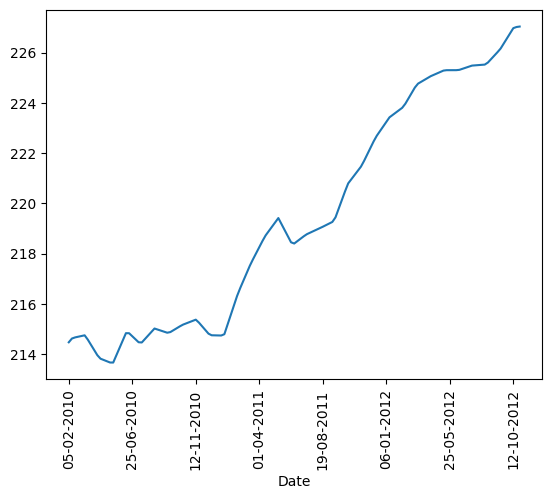

In [158]:
plt.figure()
walmart.CPI.plot()
plt.xticks(rotation=90)
plt.show()

### Here CPI is increase over the period of time 

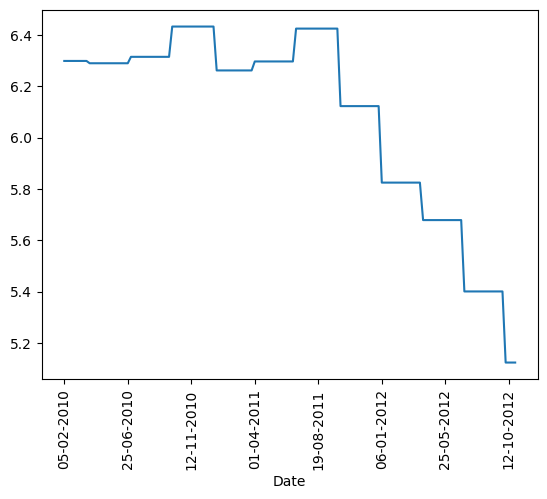

In [161]:
plt.figure()
walmart.Unemployment.plot()
plt.xticks(rotation=90)
plt.show()

### Here unemployment is decreased over the period of time 

# BIVARIATE ANALYSIS

<AxesSubplot: >

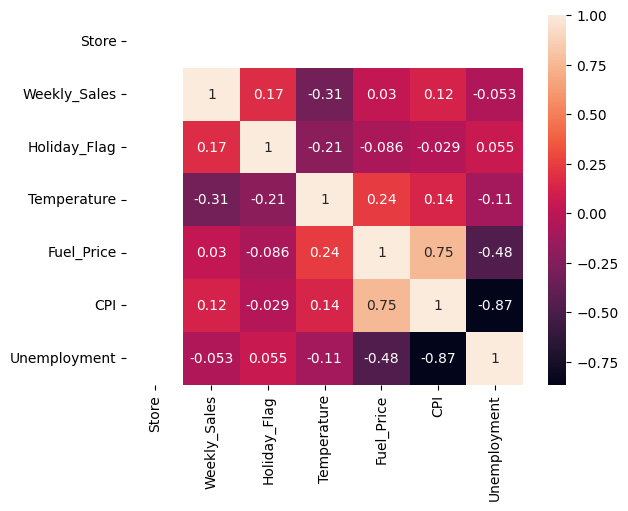

In [150]:
sns.heatmap(walmart.corr(),annot=True)

### Here is Highest Positive correlation is between .024 is between Fuel and Temp and Negative Correlation is between -0.87  is between CPI and Unemployment  so there is Fuel and Temp is highly correlated and CPI and Unemployment is highly corelateted 

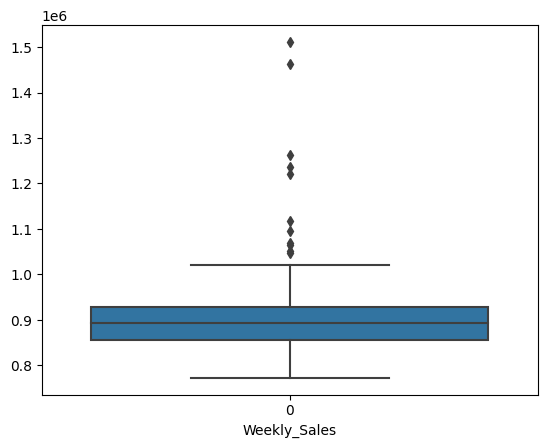

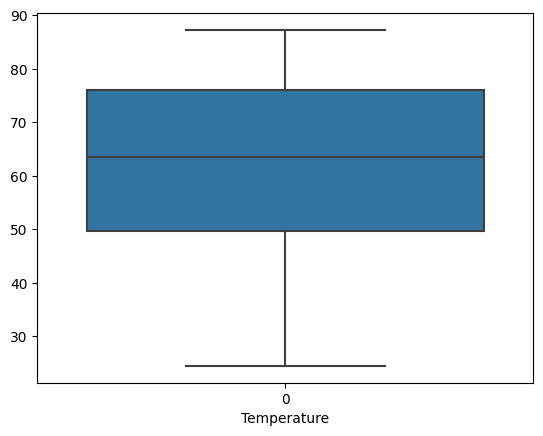

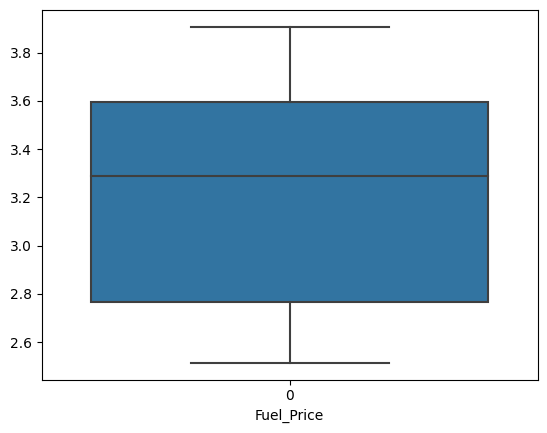

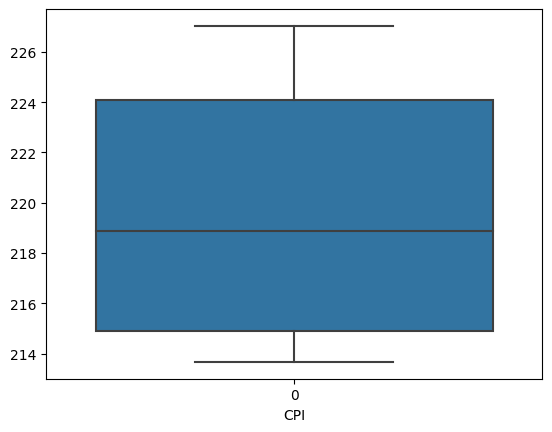

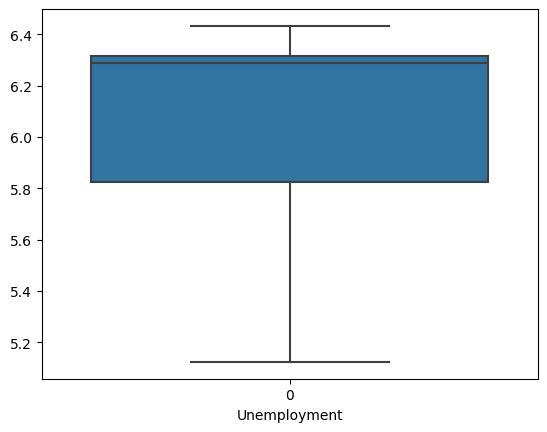

In [186]:
for i in walmart.columns:
    if i!= "Store" and i!= "Holiday_Flag":
        plt.figure()
        sns.boxplot(walmart[i])
        plt.xlabel(i)
        plt.show()

### Here in only in Weekly sales have outliear but we do not remove these outlier because these outlier can be handle by model 

# MODEL BULDING PROCESS

In [120]:
#z=list(Walmart.index)
Walmart.index.value_counts()

05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: Date, Length: 143, dtype: int64

In [121]:
# Here are 45 store so we take user input of which he wants to see the prediction of sales
store=int(input(" Entere the store Id: "))
walmart=Walmart[Walmart.Store==store]

 Entere the store Id: 8


In [122]:
sales=pd.DataFrame(walmart.Weekly_Sales.groupby(walmart.index).sum())

In [123]:
sales.head()

,Weekly_Sales
Date,
01-04-2011,878762.30
01-06-2012,921161.20
01-07-2011,883683.35
01-10-2010,804105.49
02-03-2012,952264.91


In [124]:
sales.reset_index(inplace=True)

In [125]:
sales["Date"]=pd.to_datetime(sales.Date)

In [126]:
sales=sales.set_index('Date')

In [127]:
sales.sort_index(ascending=True,inplace=True)


In [128]:
sales

,Weekly_Sales
Date,
2010-01-10,804105.49
2010-02-04,914500.91
2010-02-07,852333.75
2010-02-19,963960.37
2010-02-26,847592.11
...,...
2012-10-08,930745.69
2012-10-19,900309.75
2012-10-26,891671.44


NameError: name 'sales' is not defined

<AxesSubplot: xlabel='Date'>

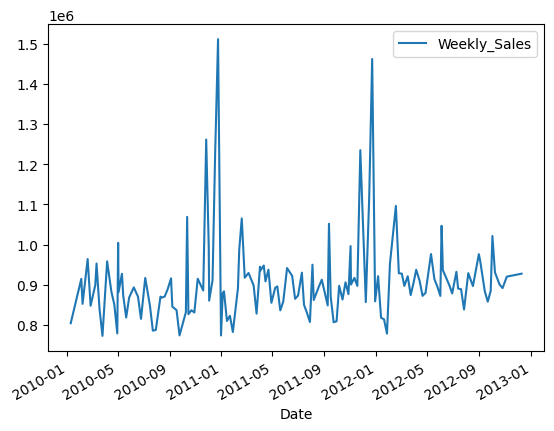

In [129]:
sales.plot()

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose

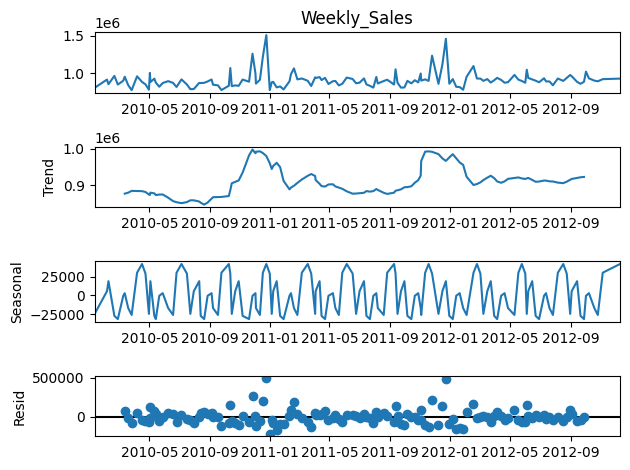

In [131]:
decomposition = seasonal_decompose(sales.Weekly_Sales,period=12)
decomposition.plot()
plt.show()

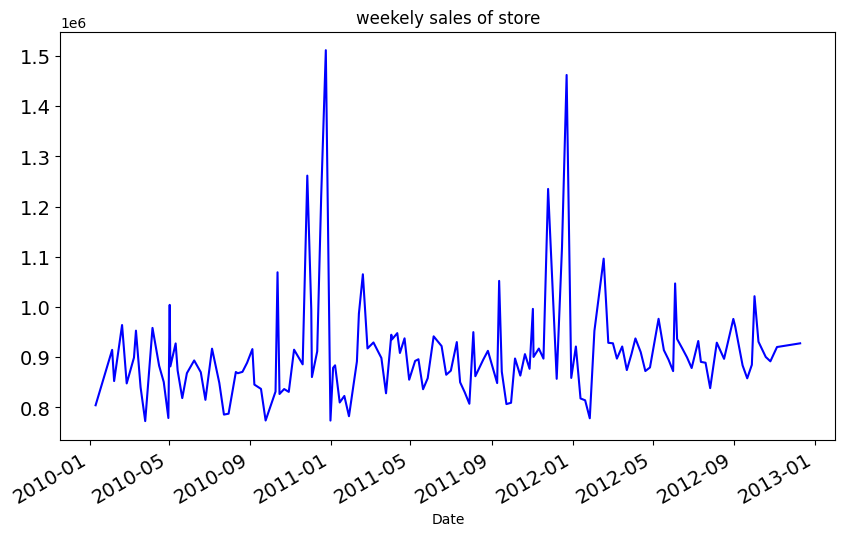

In [132]:
sales.Weekly_Sales.plot(figsize=(10,6) , title="weekely sales of store",fontsize=14,color='blue')
plt.show()

In [133]:
#lets compare the 2012 data of two stores
#lets take store 5 for analysis 
Store5 =Walmart[Walmart.Store==5]

In [134]:
sales5 =pd.DataFrame(Store5.Weekly_Sales.groupby(Store5.index).sum())
sales5.reset_index(inplace=True)
sales5["Date"]=pd.to_datetime(sales5.Date)
sales5.set_index("Date",inplace=True)
sales5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2011-01-04 to 2010-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [135]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

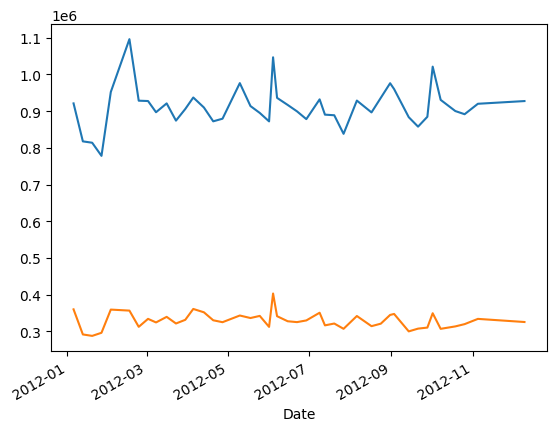

In [136]:
y1['2012'].plot()
y2['2012'].plot()
plt.show()

In [137]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

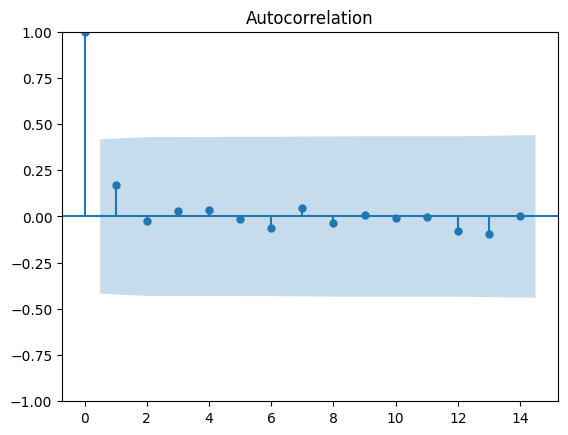

In [138]:
p1=acf(sales)
plot_acf(p1);

In [139]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

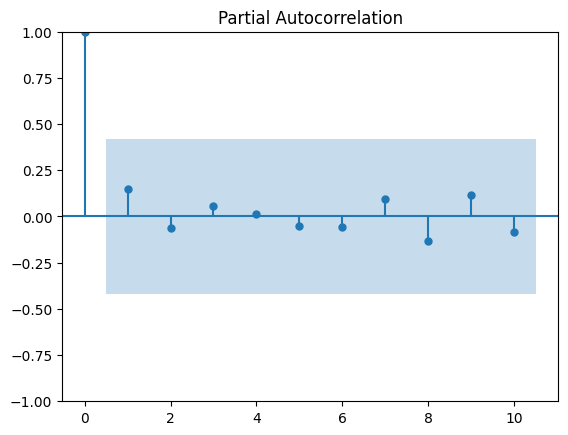

In [140]:
p2=pacf(sales)
plot_pacf(p2 ,lags=10);

In [141]:
p=d=q=range(0,5)
import itertools
pdq=list(itertools.product(p,d,q))
for x in pdq:
    sesonal_pdq=(x[0],x[1],x[2],52) # 53 is for no of weeks in a year


In [142]:
train=sales.iloc[:98]["Weekly_Sales"]
test=sales.iloc[99:]["Weekly_Sales"]

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [144]:
mod=SARIMAX(sales,order=(1,0,1),seasonal_order=(1,0,1,52))
mod=mod.fit()

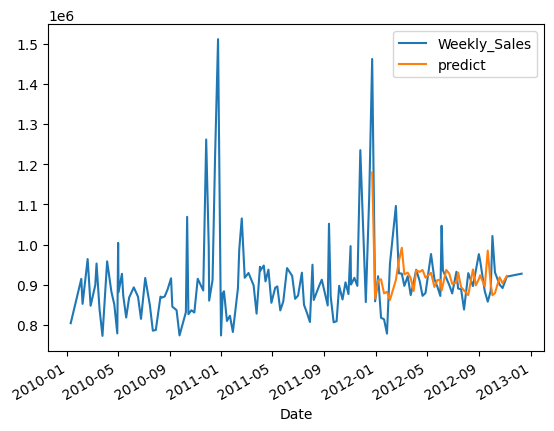

In [145]:
sales["predict"]=mod.predict(start=len(train),end=len(train)+len(test)-1 ,dynamics=True)
sales[["Weekly_Sales","predict"]].plot()
plt.show()

<AxesSubplot: >

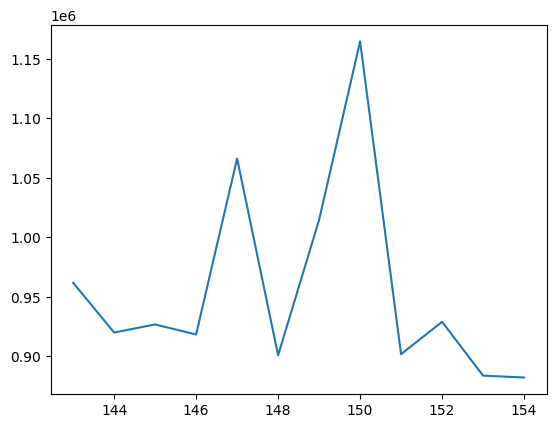

In [146]:
forecast=mod.forecast(steps=12)
forecast.plot()